0.0
5.596109318640514
0.3466386420047803
0.30571273488184814
0.24837002483600276


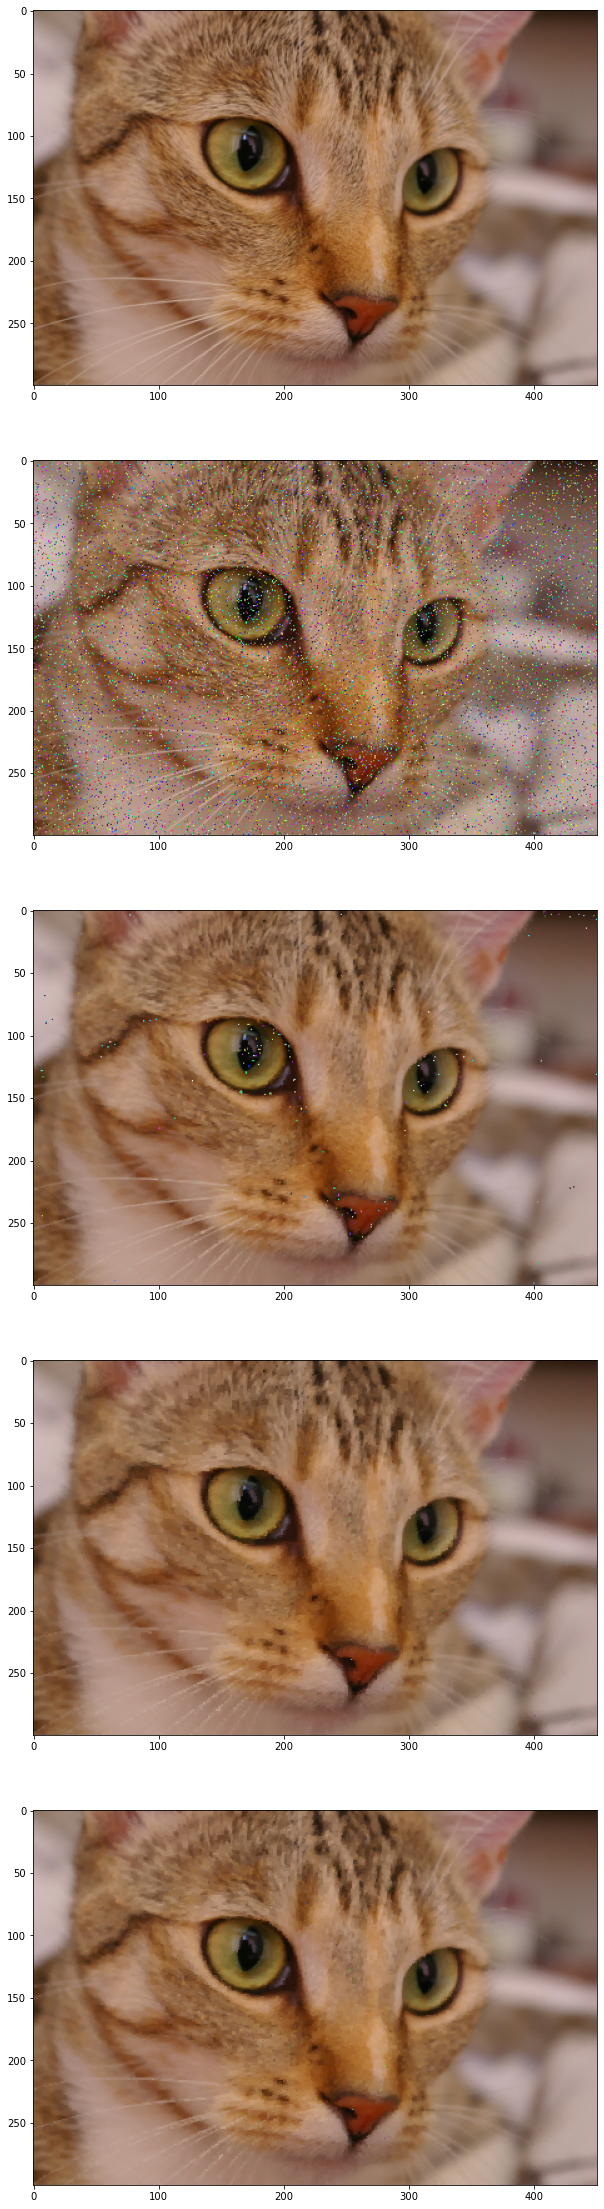

In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import skimage
import random
import scipy
from statistics import mean
def nmse(img,img2):
    size,size2,z=img.shape
    img=np.rint(img)
    img=img.astype(np.float64)
    img2=np.rint(img2)
    img2=img2.astype(np.float64)
#     m=(np.sum(np.square(np.linalg.norm(img[:, :, 0]-img2[:, :, 0])))+np.sum(np.square(np.linalg.norm(img[:, :, 1]-img2[:, :, 1])))+np.sum(np.square(np.linalg.norm(img[:, :, 2]-img2[:, :, 2])))).astype(np.float64)
#     n=(np.sum(np.square(img[:, :, 0]))+np.sum(np.square(img[:, :, 1]))+np.sum(np.square(img[:, :, 2]))).astype(np.float64)
    m=(np.sum(np.square(np.linalg.norm(img-img2)))).astype(np.float64)
    n=(np.sum(np.square(img))).astype(np.float64)
    return (m/n).astype(np.float64)*100
def vmf(img,y,x,imgsh):
    p0=img[y,x]
    size,size2,z=img.shape
    if (y-1)<0:
        out=imgsh[0]
        p1=out[y,x]
    else:
        p1=img[y-1,x]
    if (x-1)<0:
        out=imgsh[1]
        p4=out[y,x]
    else:
        p4=img[y,x-1]
    if (x+1)>=size2:
        out=imgsh[2]
        p2=out[y,x]
    else:
        p2=img[y,x+1]
    if (y+1)>=size:
        out=imgsh[3]
        p3=out[y,x]
    else:
        p3=img[y+1,x]
    p0=np.rint(p0)
    p1=np.rint(p1)
    p2=np.rint(p2)
    p3=np.rint(p3)
    p4=np.rint(p4)
    suma0 = np.linalg.norm(p0 - p1) + np.linalg.norm(p0 - p2) + np.linalg.norm(p0 - p3) + np.linalg.norm(p0 - p4)
    suma1 = np.linalg.norm(p0 - p1) + np.linalg.norm(p1 - p2) + np.linalg.norm(p1 - p3) + np.linalg.norm(p1 - p4)
    suma2 = np.linalg.norm(p0 - p2) + np.linalg.norm(p1 - p2) + np.linalg.norm(p2 - p3) + np.linalg.norm(p2 - p4)
    suma3 = np.linalg.norm(p0 - p3) + np.linalg.norm(p1 - p3) + np.linalg.norm(p2 - p3) + np.linalg.norm(p3 - p4)
    suma4 = np.linalg.norm(p0 - p4) + np.linalg.norm(p1 - p4) + np.linalg.norm(p2 - p4) + np.linalg.norm(p3 - p4)
    sumamin = suma0
    if sumamin>suma1:
        p0 = p1
        sumamin = suma1
    if sumamin>suma2:
        p0 = p2
        sumamin = suma2
    if sumamin>suma3:
        p0 = p3
        sumamin = suma3
    if sumamin>suma4:
        p0 = p4
    return p0
def fmvmf(img,y,x,beta,imgsh):
    p0=img[y,x]
    size,size2,z=img.shape
    if (y-1)<0:
        out=imgsh[0]
        p1=out[y,x]
    else:
        p1=img[y-1,x]
    if (x-1)<0:
        out=imgsh[1]
        p4=out[y,x]
    else:
        p4=img[y,x-1]
    if (x+1)>=size2:
        out=imgsh[2]
        p2=out[y,x]
    else:
        p2=img[y,x+1]
    if (y+1)>=size:
        out=imgsh[3]
        p3=out[y,x]
    else:
        p3=img[y+1,x]
    p0=np.rint(p0)
    p0=p0.astype(np.float64)
    p1=np.rint(p1)
    p1=p1.astype(np.float64)
    p2=np.rint(p2)
    p2=p2.astype(np.float64)
    p3=np.rint(p3)
    p3=p3.astype(np.float64)
    p4=np.rint(p4)
    p4=p4.astype(np.float64)
    suma0 = np.linalg.norm(p0 - p1) + np.linalg.norm(p0 - p2) + np.linalg.norm(p0 - p3) + np.linalg.norm(p0 - p4) - beta
    suma1 = np.linalg.norm(p1 - p2) + np.linalg.norm(p1 - p3) + np.linalg.norm(p1 - p4)
    suma2 = np.linalg.norm(p1 - p2) + np.linalg.norm(p2 - p3) + np.linalg.norm(p2 - p4)
    suma3 = np.linalg.norm(p1 - p3) + np.linalg.norm(p2 - p3) + np.linalg.norm(p3 - p4)
    suma4 = np.linalg.norm(p1 - p4) + np.linalg.norm(p2 - p4) + np.linalg.norm(p3 - p4)
    sumamin = suma1
    ptmp = p1
    if sumamin>suma2:
        ptmp = p2
        sumamin = suma2
    if sumamin>suma3:
        ptmp = p3 
        sumamin = suma3
    if sumamin>suma4:
        ptmp = p4
        sumamin = suma4
    if suma0>sumamin:
        p0 = ptmp;
    return p0
def pnnvmf(img,y,x,beta,imgsh):
    p0=img[y,x]
    size,size2,z=img.shape
    if (y-1)<0:
        out=imgsh[0]
        p1=out[y,x]
    else:
        p1=img[y-1,x]
    if (x-1)<0:
        out=imgsh[1]
        p4=out[y,x]
        p4N=fmvmf(out,y,x,beta,imgsh)
    else:
        p4=img[y,x-1]
        p4N=fmvmf(img,y,x-1,beta,imgsh)
    if (x+1)>=size2:
        out=imgsh[2]
        p2=out[y,x]
    else:
        p2=img[y,x+1]
    if (y+1)>=size:
        out=imgsh[3]
        p3=out[y,x]
        p3N=fmvmf(out,y,x,beta,imgsh)
    else:
        p3=img[y+1,x]
        p3N=fmvmf(img,y+1,x,beta,imgsh)
    p0=np.rint(p0)
    p0=p0.astype(np.float64)
    p1=np.rint(p1)
    p1=p1.astype(np.float64)
    p2=np.rint(p2)
    p2=p2.astype(np.float64)
    p3=np.rint(p3)
    p3=p3.astype(np.float64)
    p4=np.rint(p4)
    p4=p4.astype(np.float64)
#     print(p3N,p3N.shape,p4N,p4N.shape)
    p3N=np.rint(p3N)
    p3N=p3N.astype(np.float64)
    p4N=np.rint(p4N)
    p4N=p4N.astype(np.float64)
    suma0 = np.linalg.norm(p0 - p1) + np.linalg.norm(p0 - p2) +  np.linalg.norm(p0 - p3N) + np.linalg.norm(p0 - p4N) - beta;
    suma1 = np.linalg.norm(p1 - p2) + np.linalg.norm(p1 - p3N) + np.linalg.norm(p1 - p4N);
    suma2 = np.linalg.norm(p1 - p2) + np.linalg.norm(p2 - p3N) + np.linalg.norm(p2 - p4N);
    suma3 = np.linalg.norm(p1 - p3N)+ np.linalg.norm(p2 - p3N) + np.linalg.norm(p3 - p4N);
    suma4 = np.linalg.norm(p1 - p4N)+ np.linalg.norm(p2 - p4N) + np.linalg.norm(p3N - p4);
    howmanygt=0;
    if suma0>suma1:
        howmanygt+=1
    if suma0>suma2:
        howmanygt+=1
    if suma0>suma3:
        howmanygt+=1
    if suma0>suma4:
        howmanygt+=1
    if howmanygt<2:
        return p0
    sumamin=suma1
    p0=p1;
    if suma2<sumamin:
        p0=p2
        sumamin=suma2
    if suma3<sumamin:
        p0=p3
        sumamin=suma3
    if suma4<sumamin:
        p0=p4
    return p0
img=skimage.data.chelsea()
# img=cv2.imread('lena.png')
# img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
imgsh=[]
imgsh.append(scipy.ndimage.shift(img,(1,0,0),mode='mirror'))
imgsh.append(scipy.ndimage.shift(img,(0,1,0),mode='mirror'))
imgsh.append(scipy.ndimage.shift(img,(-1,0,0),mode='mirror'))
imgsh.append(scipy.ndimage.shift(img,(0,-1,0),mode='mirror'))
p=4
N = img.size * p // 100
img2=img.copy()
for i in range(0,N):
    x=random.randint(0,img.shape[1]-1)
    y=random.randint(0,img.shape[0]-1)
    R=random.randint(0,256)
    G=random.randint(0,256)
    B=random.randint(0,256)
    img2[y,x] = (R, G, B)
f, ax2 = plt.subplots(5,1,figsize=(40,40))
imgvmf=img2.copy()
imgfmvmf=img2.copy()
imgpnn=img2.copy()
size,size2,z=img.shape
for y in range(0,size):
    for x in range(0,size2):
        imgvmf[y,x]=vmf(imgvmf,y,x,imgsh)
        imgfmvmf[y,x]=fmvmf(imgfmvmf,y,x,0.75,imgsh)
        imgpnn[y,x]=pnnvmf(imgpnn,y,x,0.75,imgsh)
ax2[0].imshow(img)
ax2[1].imshow(img2)
ax2[2].imshow(imgvmf)
ax2[3].imshow(imgfmvmf)
ax2[4].imshow(imgpnn)
print(nmse(img,img))
print(nmse(img,img2))
print(nmse(img,imgvmf))
print(nmse(img,imgfmvmf))
print(nmse(img,imgpnn))

0.0
5.579607084276991
0.4336284305011517
0.34509381940409706
0.32779686028939353


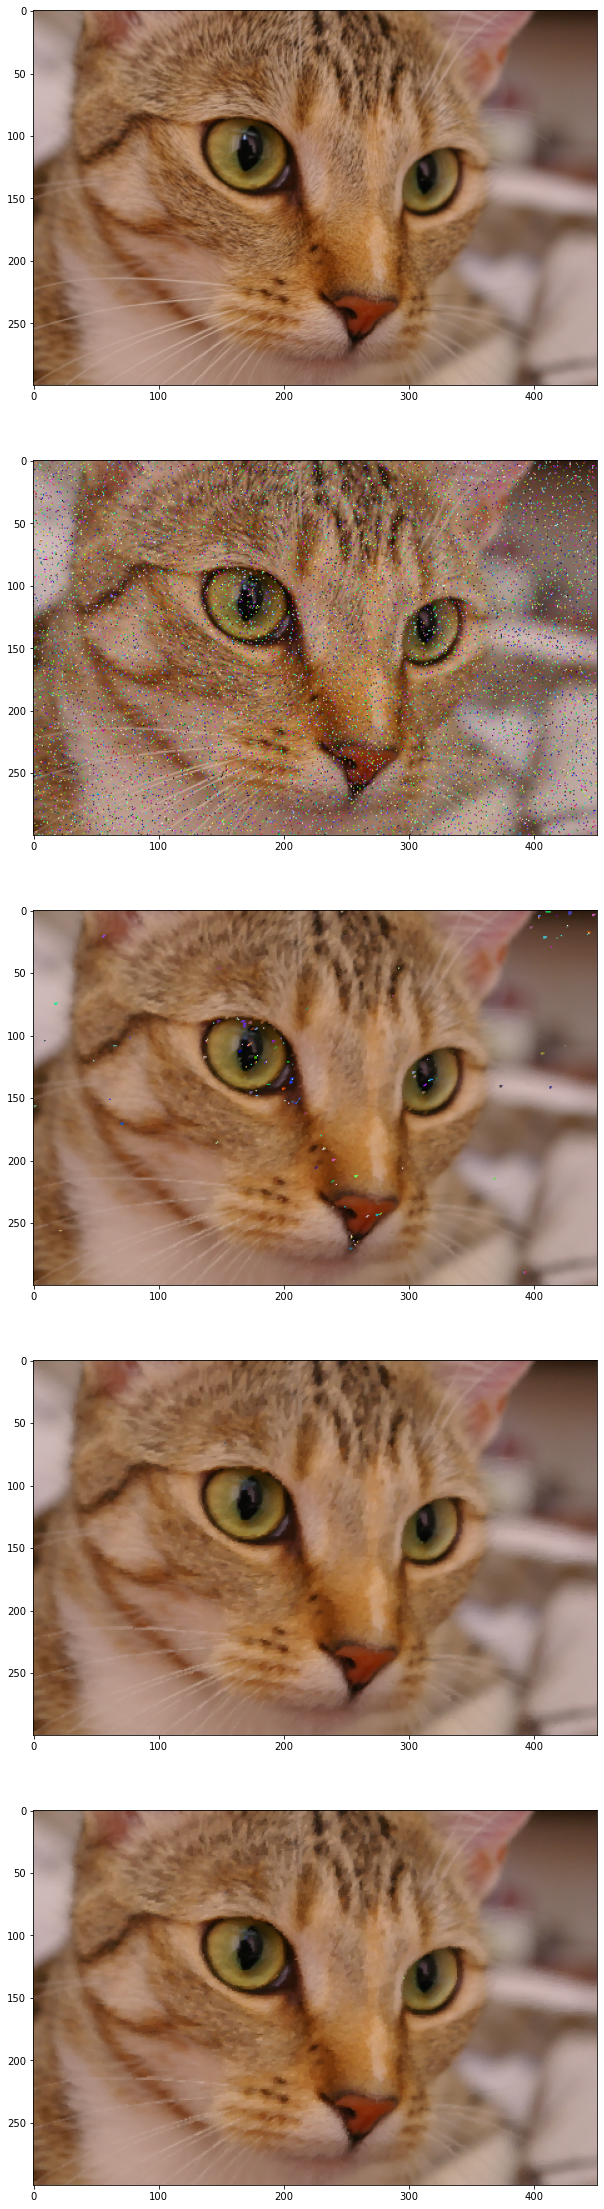

In [4]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import skimage
import random
import scipy
from statistics import mean
def nmse(img,img2):
    size,size2,z=img.shape
    img=np.rint(img)
    img=img.astype(np.float64)
    img2=np.rint(img2)
    img2=img2.astype(np.float64)
    m=(np.sum(np.square(np.linalg.norm(img-img2)))).astype(np.float64)
    n=(np.sum(np.square(img))).astype(np.float64)
    return (m/n).astype(np.float64)*100
    
def vmf(img,y,x,imgsh):
    p0=img[y,x]
    size,size2,z=img.shape
    if (y-1)<0:
        out=imgsh[0]
        p1=out[y,x]
    else:
        p1=img[y-1,x]
    if (x+1)>=size2 or (y-1)<0:
        out=imgsh[0]
        p2=out[y,x]
    else:
        p2=img[y-1,x+1]
    if (x+1)>=size2:
        out=imgsh[2]
        p3=out[y,x]
    else:
        p3=img[y,x+1]
    if (x+1)>=size2 or (y+1)>=size:
        out=imgsh[2]
        p4=out[y,x]
    else:
        p4=img[y+1,x+1]
    if (y+1)>=size:
        out=imgsh[3]
        p5=out[y,x]
    else:
        p5=img[y+1,x]
    if (x-1)<0 or (y+1)>=size:
        out=imgsh[1]
        p6=out[y,x]
    else:
        p6=img[y+1,x-1]
    if (x-1)<0:
        out=imgsh[1]
        p7=out[y,x]
    else:
        p7=img[y,x-1]
    p0=np.rint(p0)
    p1=np.rint(p1)
    p2=np.rint(p2)
    p3=np.rint(p3)
    p4=np.rint(p4)
    p5=np.rint(p5)
    p6=np.rint(p6)
    p7=np.rint(p7)
    suma0 = np.linalg.norm(p0 - p1) + np.linalg.norm(p0 - p2) + np.linalg.norm(p0 - p3) + np.linalg.norm(p0 - p4) + np.linalg.norm(p0 - p5) + np.linalg.norm(p0 - p6) + np.linalg.norm(p0 - p7)
    suma1 = np.linalg.norm(p0 - p1) + np.linalg.norm(p1 - p2) + np.linalg.norm(p1 - p3) + np.linalg.norm(p1 - p4) + np.linalg.norm(p1 - p5) + np.linalg.norm(p1 - p6) + np.linalg.norm(p1 - p7)
    suma2 = np.linalg.norm(p0 - p2) + np.linalg.norm(p1 - p2) + np.linalg.norm(p2 - p3) + np.linalg.norm(p2 - p4) + np.linalg.norm(p2 - p5) + np.linalg.norm(p2 - p6) + np.linalg.norm(p2 - p7)
    suma3 = np.linalg.norm(p0 - p3) + np.linalg.norm(p1 - p3) + np.linalg.norm(p2 - p3) + np.linalg.norm(p3 - p4) + np.linalg.norm(p3 - p5) + np.linalg.norm(p3 - p6) + np.linalg.norm(p3 - p7)
    suma4 = np.linalg.norm(p0 - p4) + np.linalg.norm(p1 - p4) + np.linalg.norm(p2 - p4) + np.linalg.norm(p3 - p4) + np.linalg.norm(p4 - p5) + np.linalg.norm(p4 - p6) + np.linalg.norm(p4 - p7)
    suma5 = np.linalg.norm(p0 - p5) + np.linalg.norm(p1 - p5) + np.linalg.norm(p2 - p5) + np.linalg.norm(p3 - p5) + np.linalg.norm(p4 - p5) + np.linalg.norm(p5 - p6) + np.linalg.norm(p5 - p7)
    suma6 = np.linalg.norm(p0 - p6) + np.linalg.norm(p1 - p6) + np.linalg.norm(p2 - p6) + np.linalg.norm(p3 - p6) + np.linalg.norm(p4 - p6) + np.linalg.norm(p5 - p6) + np.linalg.norm(p6 - p7)
    suma7 = np.linalg.norm(p0 - p7) + np.linalg.norm(p1 - p7) + np.linalg.norm(p2 - p7) + np.linalg.norm(p3 - p7) + np.linalg.norm(p4 - p7) + np.linalg.norm(p5 - p7) + np.linalg.norm(p6 - p7)
    sumamin = suma0
    if sumamin>suma1:
        p0 = p1
        sumamin = suma1
    if sumamin>suma2:
        p0 = p2
        sumamin = suma2
    if sumamin>suma3:
        p0 = p3
        sumamin = suma3
    if sumamin>suma4:
        p0 = p4
        sumamin = suma4
    if sumamin>suma5:
        p0 = p5
        sumamin = suma5
    if sumamin>suma6:
        p0 = p6
        sumamin = suma6
    if sumamin>suma7:
        p0 = p7
    return p0
def fmvmf(img,y,x,beta,imgsh):
    p0=img[y,x]
    size,size2,z=img.shape
    if (y-1)<0:
        out=imgsh[0]
        p1=out[y,x]
    else:
        p1=img[y-1,x]
    if (x+1)>=size2 or (y-1)<0:
        out=imgsh[0]
        p2=out[y,x]
    else:
        p2=img[y-1,x+1]
    if (x+1)>=size2:
        out=imgsh[2]
        p3=out[y,x]
    else:
        p3=img[y,x+1]
    if (x+1)>=size2 or (y+1)>=size:
        out=imgsh[2]
        p4=out[y,x]
    else:
        p4=img[y+1,x+1]
    if (y+1)>=size:
        out=imgsh[3]
        p5=out[y,x]
    else:
        p5=img[y+1,x]
    if (x-1)<0 or (y+1)>=size:
        out=imgsh[1]
        p6=out[y,x]
    else:
        p6=img[y+1,x-1]
    if (x-1)<0:
        out=imgsh[1]
        p7=out[y,x]
    else:
        p7=img[y,x-1]
    p0=np.rint(p0)
    p0=p0.astype(np.float64)
    p1=np.rint(p1)
    p1=p1.astype(np.float64)
    p2=np.rint(p2)
    p2=p2.astype(np.float64)
    p3=np.rint(p3)
    p3=p3.astype(np.float64)
    p4=np.rint(p4)
    p4=p4.astype(np.float64)
    p5=np.rint(p5)
    p5=p5.astype(np.float64)
    p6=np.rint(p6)
    p6=p6.astype(np.float64)
    p7=np.rint(p7)
    p7=p7.astype(np.float64)
    suma0 = np.linalg.norm(p0 - p1) + np.linalg.norm(p0 - p2) + np.linalg.norm(p0 - p3) + np.linalg.norm(p0 - p4) + np.linalg.norm(p0 - p5) + np.linalg.norm(p0 - p6) + np.linalg.norm(p0 - p7) - beta
    suma1 = np.linalg.norm(p1 - p2) + np.linalg.norm(p1 - p3) + np.linalg.norm(p1 - p4) + np.linalg.norm(p1 - p5) + np.linalg.norm(p1 - p6) + np.linalg.norm(p1 - p7)
    suma2 = np.linalg.norm(p1 - p2) + np.linalg.norm(p2 - p3) + np.linalg.norm(p2 - p4) + np.linalg.norm(p2 - p5) + np.linalg.norm(p2 - p6) + np.linalg.norm(p2 - p7)
    suma3 = np.linalg.norm(p1 - p3) + np.linalg.norm(p2 - p3) + np.linalg.norm(p3 - p4) + np.linalg.norm(p3 - p5) + np.linalg.norm(p3 - p6) + np.linalg.norm(p3 - p7)
    suma4 = np.linalg.norm(p1 - p4) + np.linalg.norm(p2 - p4) + np.linalg.norm(p3 - p4) + np.linalg.norm(p4 - p5) + np.linalg.norm(p4 - p6) + np.linalg.norm(p4 - p7)
    suma5 = np.linalg.norm(p1 - p5) + np.linalg.norm(p2 - p5) + np.linalg.norm(p3 - p5) + np.linalg.norm(p4 - p5) + np.linalg.norm(p5 - p6) + np.linalg.norm(p5 - p7)
    suma6 = np.linalg.norm(p1 - p6) + np.linalg.norm(p2 - p6) + np.linalg.norm(p3 - p6) + np.linalg.norm(p4 - p6) + np.linalg.norm(p5 - p6) + np.linalg.norm(p6 - p7)
    suma7 = np.linalg.norm(p1 - p7) + np.linalg.norm(p2 - p7) + np.linalg.norm(p3 - p7) + np.linalg.norm(p4 - p7) + np.linalg.norm(p5 - p7) + np.linalg.norm(p6 - p7)
    sumamin = suma1
    ptmp = p1
    if sumamin>suma2:
        ptmp = p2
        sumamin = suma2
    if sumamin>suma3:
        ptmp = p3
        sumamin = suma3
    if sumamin>suma4:
        ptmp = p4
        sumamin = suma4
    if sumamin>suma5:
        ptmp = p5 
        sumamin = suma5
    if sumamin>suma6:
        ptmp = p6
        sumamin = suma6
    if sumamin>suma7:
        ptmp = p7
        sumamin = suma7
    if suma0>sumamin:
        p0 = ptmp;
    return p0
def pnnvmf(img,y,x,beta,imgsh):
    p0=img[y,x]
    size,size2,z=img.shape
    if (y-1)<0:
        out=imgsh[0]
        p1=out[y,x]
    else:
        p1=img[y-1,x]
    if (x+1)>=size2 or (y-1)<0:
        out=imgsh[0]
        p2=out[y,x]
    else:
        p2=img[y-1,x+1]
    if (x+1)>=size2:
        out=imgsh[2]
        p3=out[y,x]
    else:
        p3=img[y,x+1]
    if (x+1)>=size2 or (y+1)>=size:
        out=imgsh[2]
        p4=out[y,x]
    else:
        p4=img[y+1,x+1]
    if (y+1)>=size:
        out=imgsh[3]
        p5=out[y,x]
        p5N=fmvmf(out,y,x,beta,imgsh)
    else:
        p5=img[y+1,x]
        p5N=fmvmf(img,y+1,x,beta,imgsh)
    if (x-1)<0 or (y+1)>=size:
        out=imgsh[1]
        p6=out[y,x]
    else:
        p6=img[y+1,x-1]
    if (x-1)<0:
        out=imgsh[1]
        p7=out[y,x]
        p7N=fmvmf(out,y,x,beta,imgsh)
    else:
        p7=img[y,x-1]
        p7N=fmvmf(img,y,x-1,beta,imgsh)
    p0=np.rint(p0)
    p0=p0.astype(np.float64)
    p1=np.rint(p1)
    p1=p1.astype(np.float64)
    p2=np.rint(p2)
    p2=p2.astype(np.float64)
    p3=np.rint(p3)
    p3=p3.astype(np.float64)
    p4=np.rint(p4)
    p4=p4.astype(np.float64)
    p5=np.rint(p5)
    p5=p5.astype(np.float64)
    p6=np.rint(p6)
    p6=p6.astype(np.float64)
    p7=np.rint(p7)
    p7=p7.astype(np.float64)
    p5N=np.rint(p5N)
    p5N=p5N.astype(np.float64)
    p7N=np.rint(p7N)
    p7N=p7N.astype(np.float64)
    suma0 = np.linalg.norm(p0 - p1) + np.linalg.norm(p0 - p2) + np.linalg.norm(p0 - p3) + np.linalg.norm(p0 - p4) + np.linalg.norm(p0 - p5N) + np.linalg.norm(p0 - p6) + np.linalg.norm(p0 - p7N) - beta;
    suma1 = np.linalg.norm(p1 - p2) + np.linalg.norm(p1 - p3) + np.linalg.norm(p1 - p4) + np.linalg.norm(p1 - p5N) + np.linalg.norm(p1 - p6) + np.linalg.norm(p1 - p7N);
    suma2 = np.linalg.norm(p1 - p2) + np.linalg.norm(p2 - p3) + np.linalg.norm(p2 - p4) + np.linalg.norm(p2 - p5N) + np.linalg.norm(p2 - p6) + np.linalg.norm(p2 - p7N);
    suma3 = np.linalg.norm(p1 - p3) + np.linalg.norm(p2 - p3) + np.linalg.norm(p3 - p4) + np.linalg.norm(p3 - p5N) + np.linalg.norm(p3 - p6) + np.linalg.norm(p3 - p7N);
    suma4 = np.linalg.norm(p1 - p4) + np.linalg.norm(p2 - p4) + np.linalg.norm(p3 - p4) + np.linalg.norm(p4 - p5N) + np.linalg.norm(p4 - p6) + np.linalg.norm(p4 - p7N);
    suma5 = np.linalg.norm(p1 - p5N) + np.linalg.norm(p2 - p5N) + np.linalg.norm(p3 - p5N) + np.linalg.norm(p4 - p5N) + np.linalg.norm(p6 - p5N) + np.linalg.norm(p5 - p7N);
    suma6 = np.linalg.norm(p1 - p6) + np.linalg.norm(p2 - p6) + np.linalg.norm(p3 - p6) + np.linalg.norm(p4 - p6) + np.linalg.norm(p6 - p5N) + np.linalg.norm(p6 - p7N);
    suma7 = np.linalg.norm(p1 - p7N) + np.linalg.norm(p2 - p7N) + np.linalg.norm(p3 - p7N) + np.linalg.norm(p4 - p7N) + np.linalg.norm(p6 - p7N) + np.linalg.norm(p5N - p7);
    howmanygt=0;
    if suma0>suma1:
        howmanygt+=1
    if suma0>suma2:
        howmanygt+=1
    if suma0>suma3:
        howmanygt+=1
    if suma0>suma4:
        howmanygt+=1
    if suma0>suma5:
        howmanygt+=1
    if suma0>suma6:
        howmanygt+=1
    if suma0>suma7:
        howmanygt+=1
    if howmanygt<2:
        return p0
    sumamin=suma1
    p0=p1;
    if suma2<sumamin:
        p0=p2
        sumamin=suma2
    if suma3<sumamin:
        p0=p3
        sumamin=suma3
    if suma4<sumamin:
        p0=p4
        sumamin=suma4
    if suma5<sumamin:
        p0=p5
        sumamin=suma5
    if suma6<sumamin:
        p0=p6
        sumamin=suma6
    if suma7<sumamin:
        p0=p7
    return p0
img=skimage.data.chelsea()
# img=cv2.imread('lena.png')
# img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
imgsh=[]
imgsh.append(scipy.ndimage.shift(img,(1,0,0),mode='mirror'))
imgsh.append(scipy.ndimage.shift(img,(0,1,0),mode='mirror'))
imgsh.append(scipy.ndimage.shift(img,(-1,0,0),mode='mirror'))
imgsh.append(scipy.ndimage.shift(img,(0,-1,0),mode='mirror'))
p=4
N = img.size * p // 100
img2=img.copy()
for i in range(0,N):
    x=random.randint(0,img.shape[1]-1)
    y=random.randint(0,img.shape[0]-1)
    R=random.randint(0,256)
    G=random.randint(0,256)
    B=random.randint(0,256)
    img2[y,x] = (R, G, B)
f, ax2 = plt.subplots(5,1,figsize=(40,40))
imgvmf=img2.copy()
imgfmvmf=img2.copy()
imgpnn=img2.copy()
size,size2,z=img.shape
for y in range(0,size):
    for x in range(0,size2):
        imgvmf[y,x]=vmf(imgvmf,y,x,imgsh)
        imgfmvmf[y,x]=fmvmf(imgfmvmf,y,x,0.75,imgsh)
        imgpnn[y,x]=pnnvmf(imgpnn,y,x,0.75,imgsh)
ax2[0].imshow(img)
ax2[1].imshow(img2)
ax2[2].imshow(imgvmf)
ax2[3].imshow(imgfmvmf)
ax2[4].imshow(imgpnn)
print(nmse(img,img))
print(nmse(img,img2))
print(nmse(img,imgvmf))
print(nmse(img,imgfmvmf))
print(nmse(img,imgpnn))